In [1]:
import pandas as pd
import numpy as np


df_air = pd.read_csv('airbnb.csv') #파일 읽기
df_air['overall_satisfaction'] = df_air.overall_satisfaction.fillna(3)
df1 = df_air.copy()
idx1 =  list(df1[['room_id', 'host_id']].itertuples(index=False, name=None)) #(room_id, host_id) index 생성
df1['total_score'] = df1['overall_satisfaction'] + df1['reviews']*0.378 #total_score 생성
df1 = pd.DataFrame(df1['total_score'].to_list(), index = idx1, columns=['total_score']) #DataFrame

df1 = df1.sort_values(by=['total_score'], ascending=True) #total_score기준 오름차순 정렬
file_name = "./sorted_total_score_ascend.csv"
df1.to_csv(file_name)

df1 = df1.sort_values(by=['total_score'], ascending=False) #total_score기준 내림차순 정렬
file_name = "./sorted_total_score_descend.csv"
df1.to_csv(file_name)

In [2]:
df_neigh = df_air.set_index(['neighborhood']).sort_index(axis=0) #index 지정 및 오름차순 정렬

def s(group):
    group['avg of reviews'] = group['reviews'].mean()
    group['avg of overall_satisfaction'] = group['overall_satisfaction'].mean()
    group['avg of price'] = group['price'].mean()
    group['max of reviews'] = group['reviews'].max()
    group['min of reviews'] = group['reviews'].min()
    group['max of price'] = group['price'].max()
    group['min of price'] = group['price'].min()
    
    return group
df_neigh = df_neigh.groupby('neighborhood').apply(s)
df_neigh = df_neigh[['avg of reviews', 'avg of overall_satisfaction','avg of price','max of reviews',
                     'min of reviews', 'max of price', 'min of price']]

file_name = "./sorted_neighborhood_factors.csv"
df_neigh.to_csv(file_name)
df_neigh

,avg of reviews,avg of overall_satisfaction,avg of price,max of reviews,min of reviews,max of price,min of price
neighborhood,,,,,,,
Allston,10.314010,3.710145,100.019324,118,0,550.0,20.0
Allston,10.314010,3.710145,100.019324,118,0,550.0,20.0
Allston,10.314010,3.710145,100.019324,118,0,550.0,20.0
Allston,10.314010,3.710145,100.019324,118,0,550.0,20.0
Allston,10.314010,3.710145,100.019324,118,0,550.0,20.0
...,...,...,...,...,...,...,...
West Roxbury,11.533333,3.766667,109.766667,155,0,375.0,45.0
West Roxbury,11.533333,3.766667,109.766667,155,0,375.0,45.0
West Roxbury,11.533333,3.766667,109.766667,155,0,375.0,45.0


In [3]:
df3 = df_air.copy()
ranged_price = [0,100,200,300,400,500,1000,5000]
ranged_price_label = ['0-100','100-200','200-300','300-400','400-500','500-1000','1000-5000']

def s(group):
    d = {}
    d['accommodates average'] = group['accommodates'].mean()
    d['bedrooms average'] = group['bedrooms'].mean()
    d['bedrooms median'] = group['bedrooms'].median()
    d['reviews average'] = group['reviews'].mean()
    d['reviews median'] = group['reviews'].median()
    d['neighbor list'] = list(group['neighborhood'])
    
    return pd.Series(d, index=['accommodates average','bedrooms average','bedrooms median',
                               'reviews average','reviews median','neighbor list'])

df3 = df3.groupby(pd.cut(df_air['price'], #cut 사용해서 그룹화
                         bins=ranged_price, 
                         right=False, # right=False '미만'으로 구역 나누기
                         labels=ranged_price_label)) 
length = df3.size() # 행 개수

df3 = df3.apply(s)
df3['length'] = length
                                    
file_name = "./sort_ranged_price.csv"
df3.to_csv(file_name)
df3

,accommodates average,bedrooms average,bedrooms median,reviews average,reviews median,neighbor list,length
price,,,,,,,
0-100,1.974026,0.989796,1.0,21.000928,5.0,"[Allston, Dorchester, East Boston, Allston, Al...",1078
100-200,2.975787,1.101133,1.0,17.102502,5.0,"[Jamaica Plain, Beacon Hill, Beacon Hill, Miss...",1239
200-300,3.871930,1.536412,1.0,13.719298,4.0,"[Back Bay, Jamaica Plain, Back Bay, Beacon Hil...",570
300-400,4.812183,2.005076,2.0,9.309645,4.0,"[South End, South Boston Waterfront, Fenway, C...",197
400-500,4.488372,1.813953,1.0,5.441860,1.0,"[Mission Hill, Downtown, South Boston Waterfro...",86
500-1000,5.322917,2.395833,2.0,5.635417,0.5,"[Back Bay, Fenway, Back Bay, Fenway, Jamaica P...",96
1000-5000,4.000000,1.909091,2.0,0.090909,0.0,"[Charlestown, South Boston, Back Bay, Bay Vill...",11


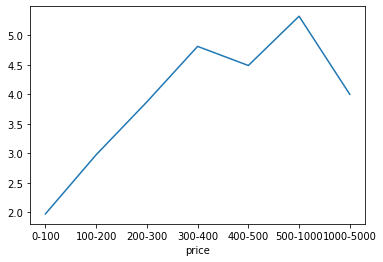

In [4]:
import matplotlib.pyplot as plt

df4 = df3.copy()

df4['accommodates average'].plot(kind='line')

plt.show()


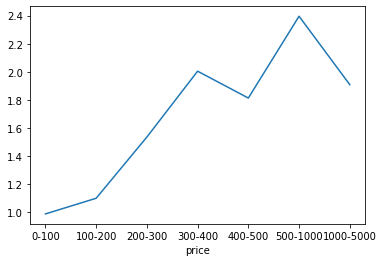

In [5]:
df4['bedrooms average'].plot(kind='line')

plt.show()

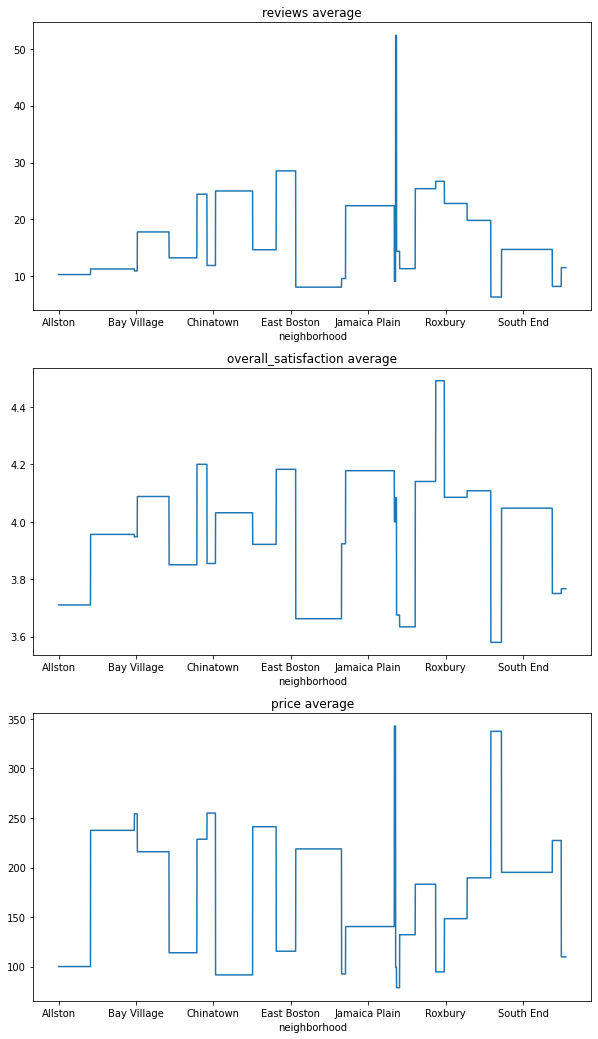

In [6]:
fig = plt.figure(figsize=(10,18)) #간격위해 사이즈 조정
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_title('reviews average')
df_neigh['avg of reviews'].plot(kind='line',ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
ax2.set_title('overall_satisfaction average')
df_neigh['avg of overall_satisfaction'].plot(kind='line',ax=ax2)

ax3 = fig.add_subplot(3, 1, 3)
ax3.set_title('price average')
df_neigh['avg of price'].plot(kind='line',ax=ax3)
plt.show()